# **Connecting to InterSystem IRIS Relational Model from C# (using ADO.NET)**

This notebook provides a step-by-step guide for C# developers looking to connect to and interact with InterSystems IRIS SQL using the ADO.NET provider.

## Step 1. Prerequisites
Before writing any code, ensure that all necessary components are installed.
|     Component     |   Status  |                           Check                    |
|-------------------|-----------|----------------------------------------------------|
| InterSystems IRIS | Running   | Ensure the IRIS instance is started and accessible |
| ADO.NET assembly  | Available | You need to have the correct version of the InterSystems IRIS ADO.NET assembly available |
| C# project        | Ready     | Your project should be set up in Visual Studio or your preferred IDE |

- If InterSystems IRIS is installed on the same machine - the file is already present in \dev\dotnet\bin.
- If InterSystems IRIS is installed on a remote server - you must download and install the standalone development package for your operating system and bitness (32-bit or 64-bit) from WRC website if you're a client or by installing development components and copying files from \dev\dotnet\bin manually.

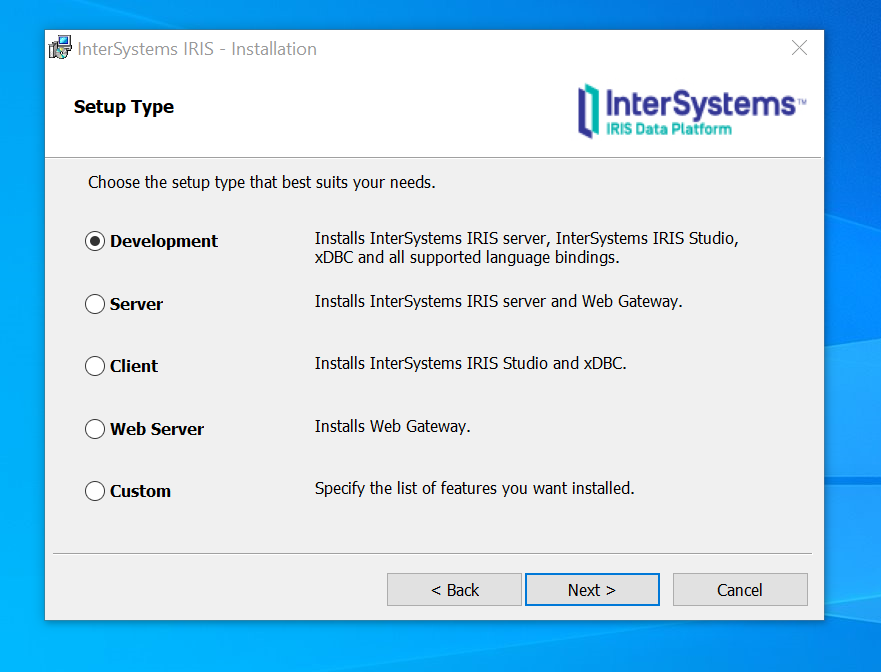

## Step 2. Forming connection string
The connection string requires three critical pieces of information: the Server location (Host and Port), the target Namespace, and Credentials (UID and PWD):
<pre>// Connection String Breakdown
string connectionString =
    "Host=127.0.0.1;" + // Hostname or IP of the IRIS server
    "Port=1972;" +      // SuperServer TCP Port
    "Namespace=USER;" + // Target IRIS Namespace
    "Password=SYS;" +   // Password (Case-Sensitive, if default)
    "User=_System;";    // Username (Case-Insensitive)                  
</pre>

## Step 3. Adding assembly to your project
Right-click Dependencies in your project in Solution Explorer → Add Project Reference…

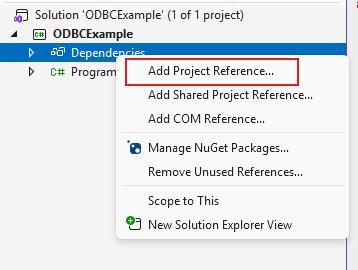

In the Reference Manager window:
Click Browse… on the bottom right. Locate InterSystems.Data.IRISClient.dll file. Click Add and OK.

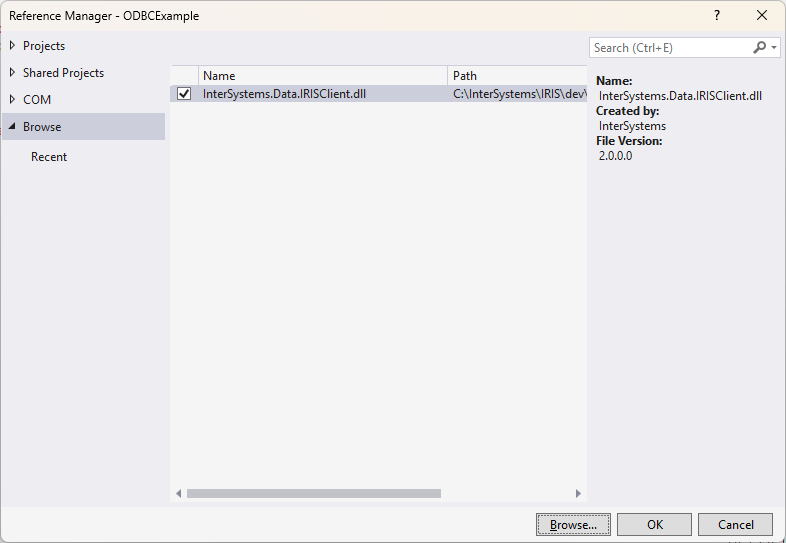

## Step 4. Writing C# code to get data from InterSystems IRIS via ADO.NET
- In the dedicated class add links to assemblies:
<pre>using InterSystems.Data.IRISClient;
using InterSystems.Data.IRISClient.ADO;
</pre>
- Create and open the connection to the database using the connectionString from Step 2:
<pre>// Use the 'using' block to ensure the connection is properly closed, 
// even if errors occur.
using (IRISConnection connection = new IRISConnection(connectionString))
{
    connection.Open();
}
</pre>
- Create and execute a SQL statement using OdbcCommand class:
<pre>// Define the SQL Query
string sql = "SELECT ID, Name, DOB FROM Sample.Person WHERE ID < 5";
using (IRISCommand command = new IRISCommand(sql, connection))
{
    using (IRISDataReader reader = command.ExecuteReader())
    { 
        //do something with the results
    }
}
</pre>
- Loop throught the result
<pre>while (reader.Read())
{
    // Access data by column name or index
    string id = reader["ID"].ToString();
    string name = reader["Name"].ToString();
    string dob = reader["DOB"].ToString();                            
    Console.WriteLine($"ID: {id}, Name: {name}, DOB: {dob}");
}
</pre>

## Resulting class
Here's the whole class including exception handling:
<pre>using InterSystems.Data.IRISClient;
using InterSystems.Data.IRISClient.ADO;

public class IrisConnector
{
    public static void Main(string[] args)
    {
        // Define the DSN-less connection string
        string connectionString =
        "Host=127.0.0.1;Port=1972;Namespace=USER;" +
        "Password=SYS;User=_System;";

        // Define the SQL Query
        string sql = "SELECT ID, Name, DOB FROM Sample.Person WHERE ID < 5";

        // Use the 'using' block to ensure the connection is properly closed, 
        // even if errors occur.
        using (IRISConnection connection = new IRISConnection(connectionString))
        {
            try
            {
                // Open the connection to InterSystems IRIS
                connection.Open();
                Console.WriteLine("Connection to InterSystems IRIS successful!");

                // Create the command and associate it with the connection
                using (IRISCommand command = new IRISCommand(sql, connection))
                {
                    // Execute the query and get a data reader
                    using (IRISDataReader reader = command.ExecuteReader())
                    {
                        // Loop through each row returned
                        while (reader.Read())
                        {
                            // Access data by column name or index
                            string id = reader["ID"].ToString();
                            string name = reader["Name"].ToString();
                            string dob = reader["DOB"].ToString();
                            
                            Console.WriteLine($"ID: {id}, Name: {name}, DOB: {dob}");
                        }
                    }
                }
            }
            catch (IRISException ex)
            {
                // Catch specific IRIS errors (e.g., driver not found, network failure)
                Console.WriteLine($"\n--- IRIS Error ---");
                Console.WriteLine($"Failed to connect or execute query: {ex.Message}");
            }
            catch (Exception ex)
            {
                // Catch other general errors
                Console.WriteLine($"\n--- General Error ---");
                Console.WriteLine($"An unexpected error occurred: {ex.Message}");
            }
        }
    }
}
</pre>
